Epoch 1/10
782/782 [==============================] - 40s 29ms/step - loss: 1.5090 - accuracy: 0.4579 - val_loss: 1.2639 - val_accuracy: 0.5533
Epoch 2/10
782/782 [==============================] - 14s 17ms/step - loss: 1.1545 - accuracy: 0.5958 - val_loss: 1.0736 - val_accuracy: 0.6301
Epoch 3/10
782/782 [==============================] - 12s 15ms/step - loss: 1.0263 - accuracy: 0.6447 - val_loss: 1.0072 - val_accuracy: 0.6559
Epoch 4/10
782/782 [==============================] - 11s 15ms/step - loss: 0.9473 - accuracy: 0.6704 - val_loss: 1.0020 - val_accuracy: 0.6546
Epoch 5/10
782/782 [==============================] - 12s 16ms/step - loss: 0.8848 - accuracy: 0.6932 - val_loss: 0.9519 - val_accuracy: 0.6761
Epoch 6/10
782/782 [==============================] - 13s 17ms/step - loss: 0.8326 - accuracy: 0.7127 - val_loss: 0.9307 - val_accuracy: 0.6825
Epoch 7/10
782/782 [==============================] - 13s 17ms/step - loss: 0.7841 - accuracy: 0.7299 - val_loss: 0.9126 - val_accuracy:

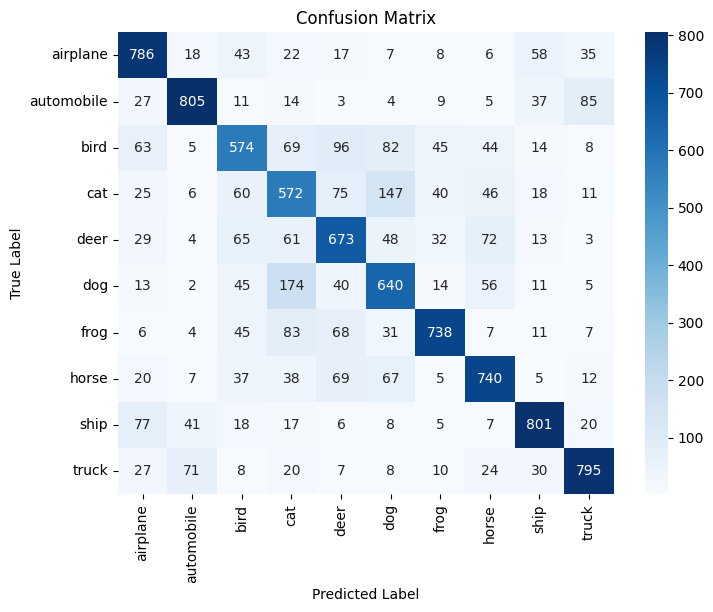

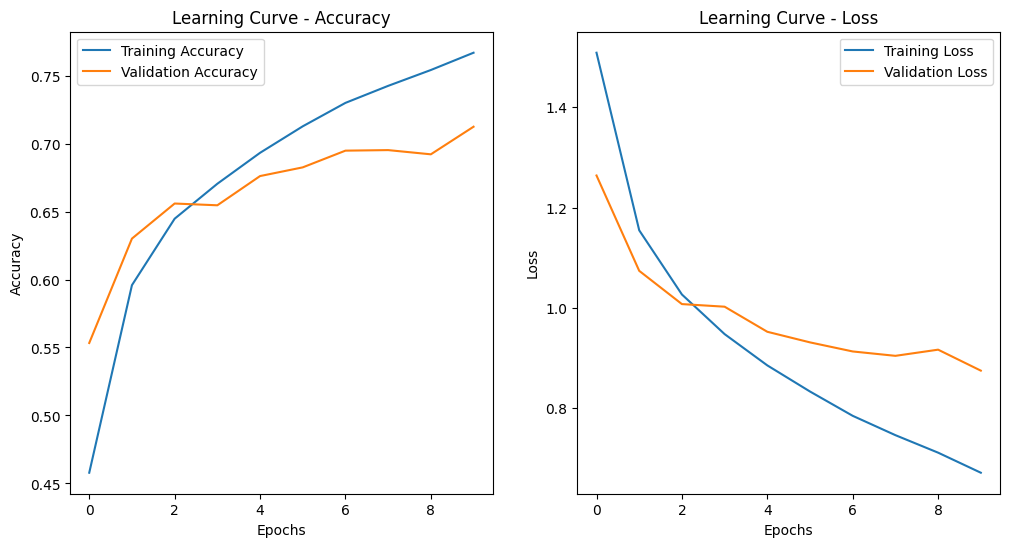

313/313 [==============================] - 2s 7ms/step


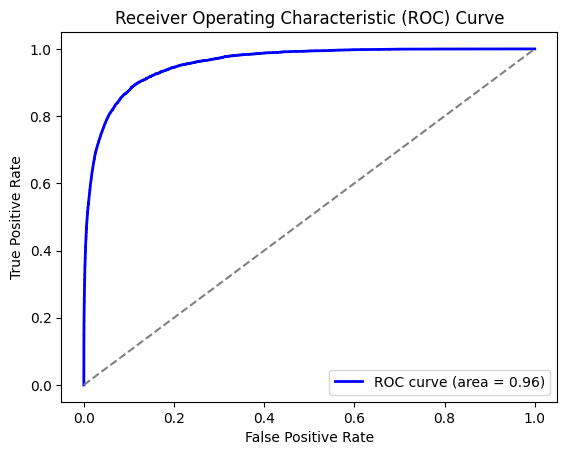

313/313 [==============================] - 2s 5ms/step


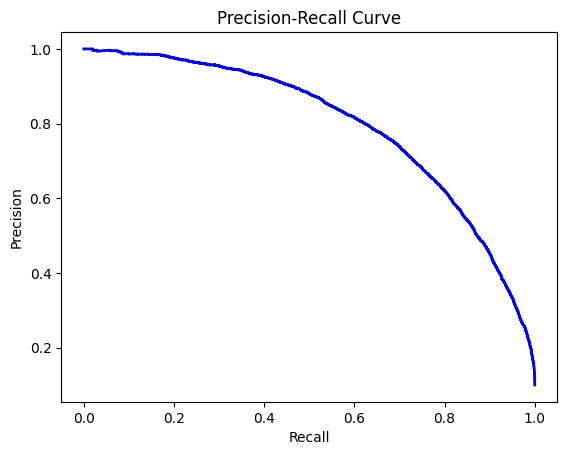

313/313 [==============================] - 1s 4ms/step


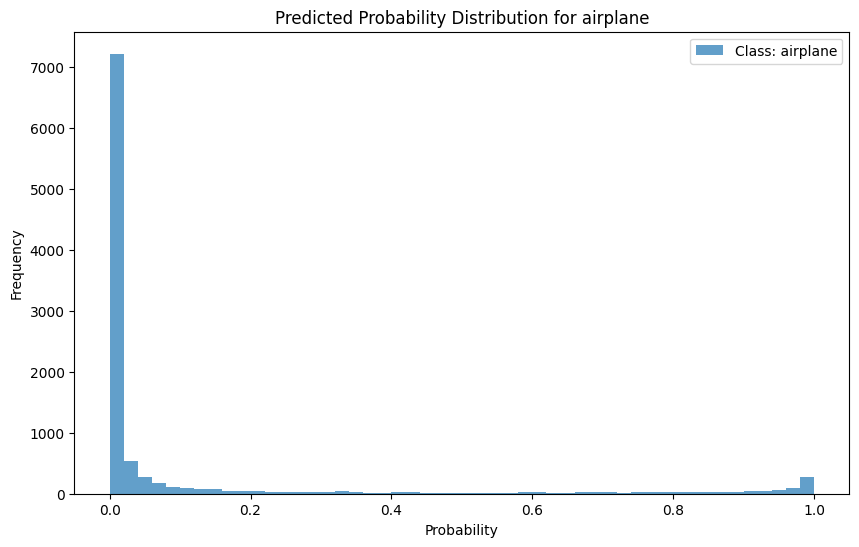

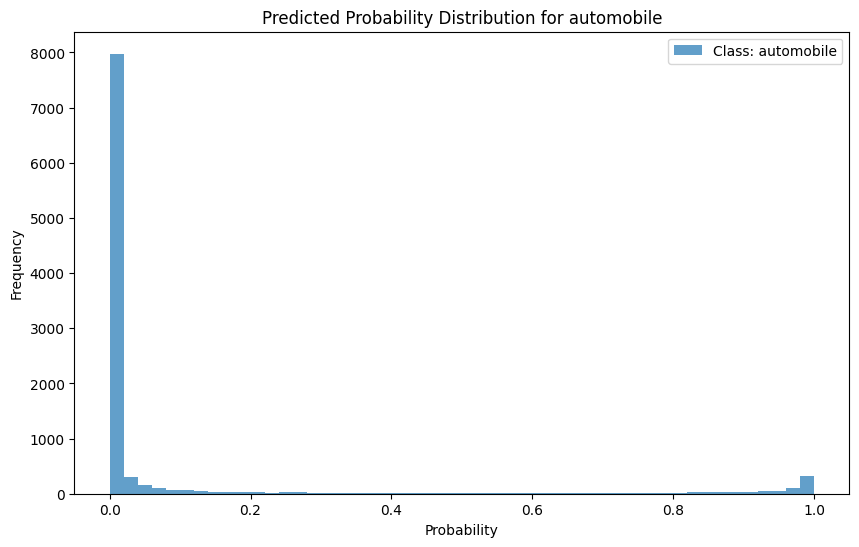

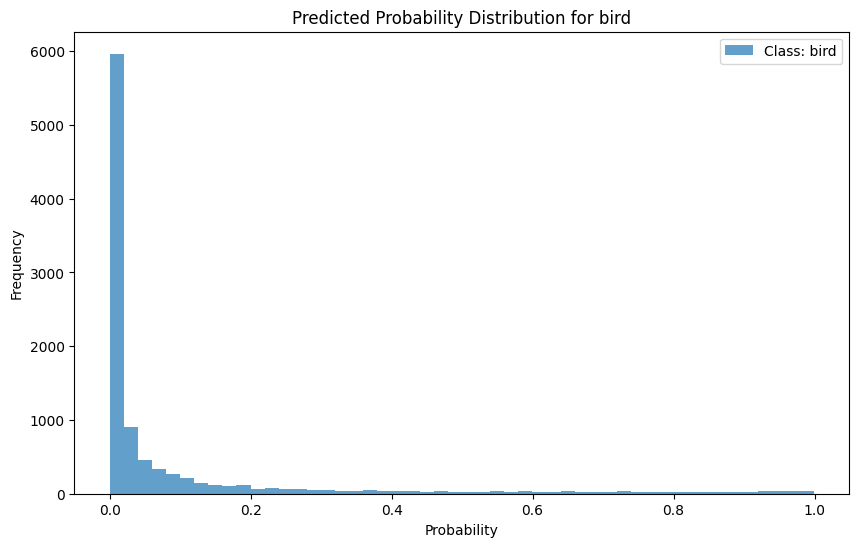

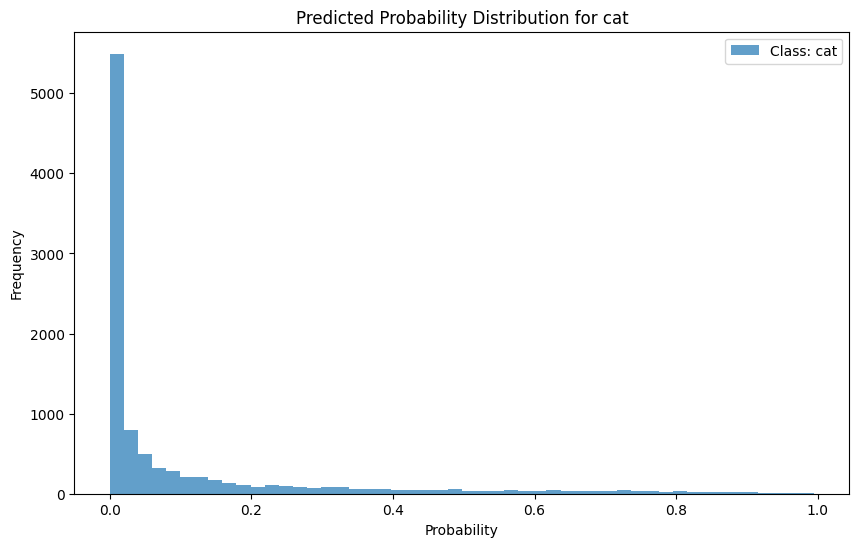

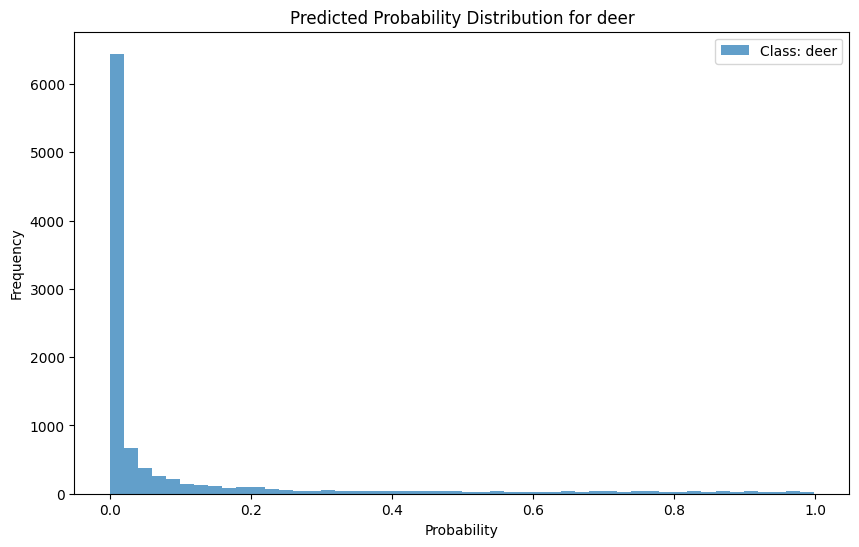

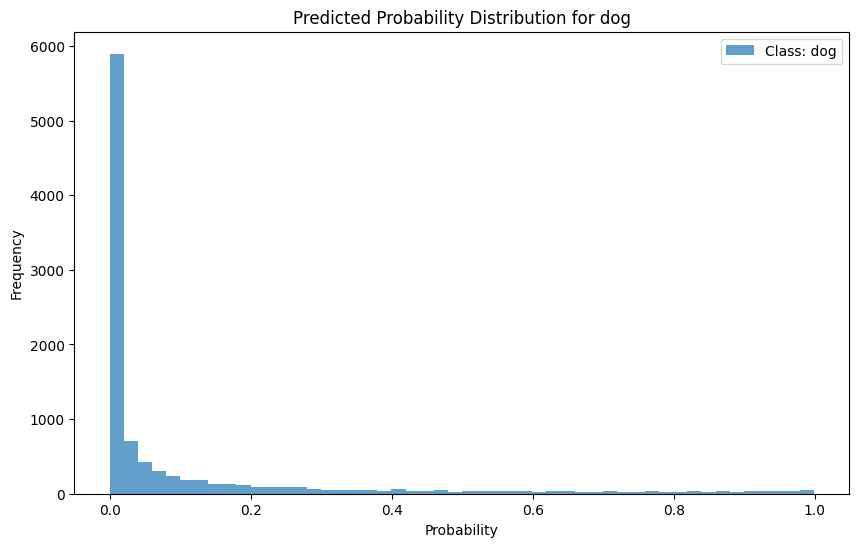

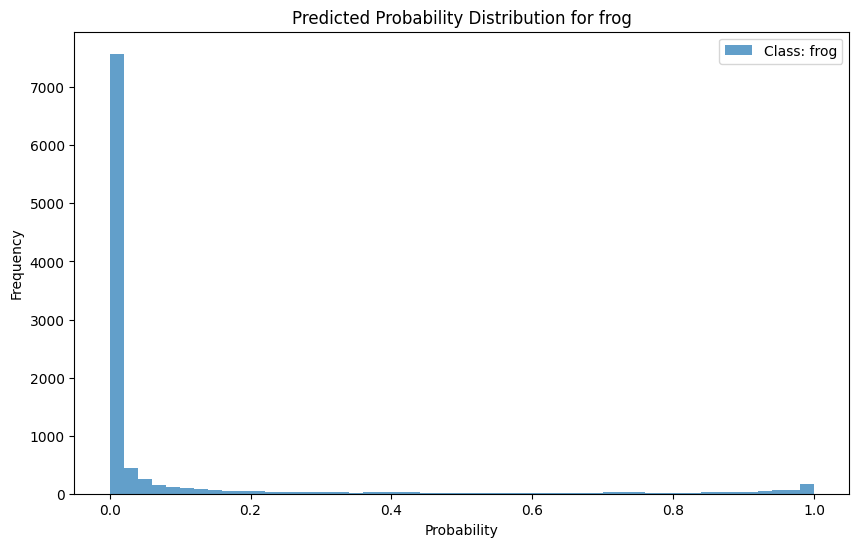

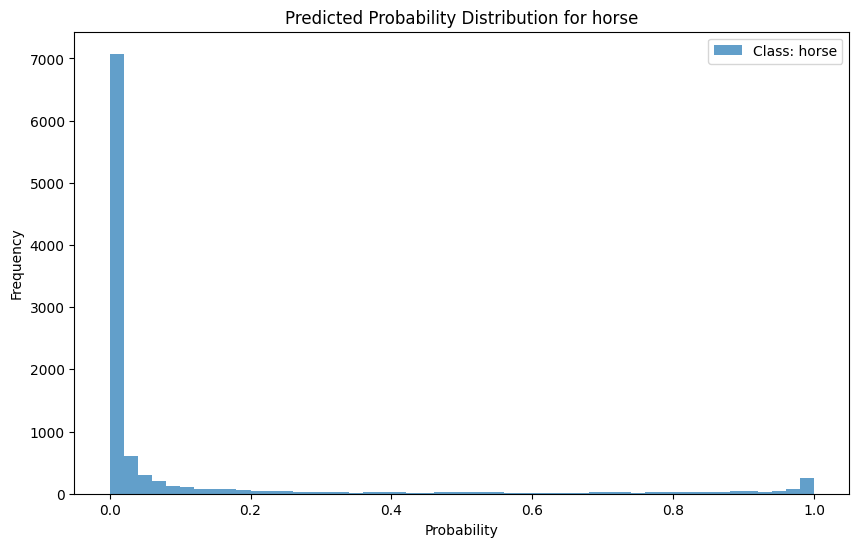

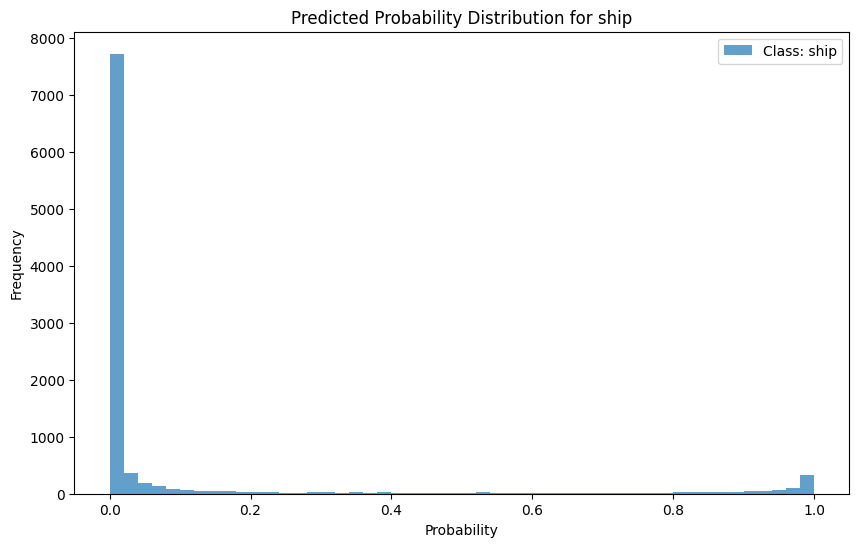

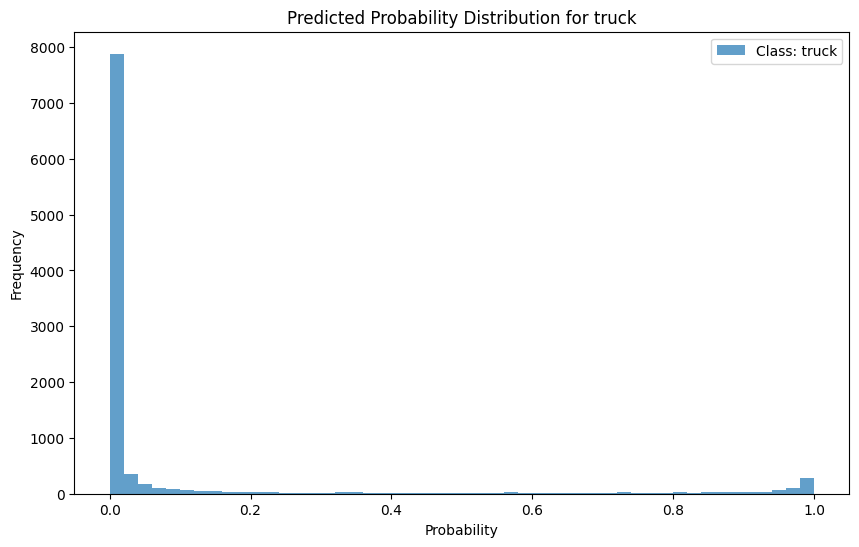

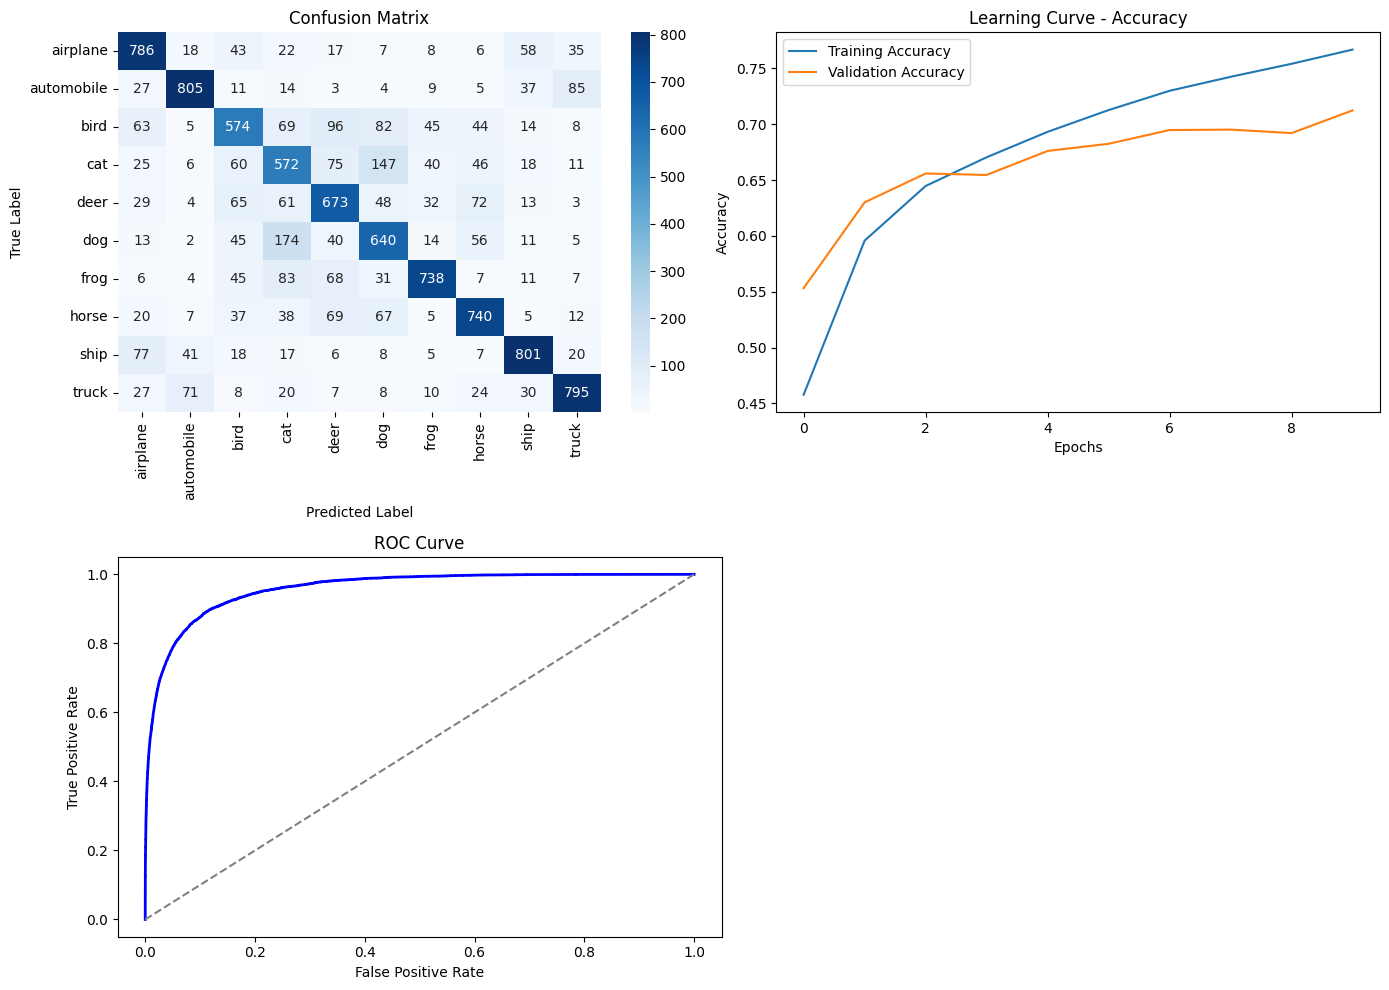

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
import seaborn as sns

physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    try:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
    except RuntimeError as e:
        print(e)

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=cifar10_classes, yticklabels=cifar10_classes)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curve - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

y_test_bin = label_binarize(y_true, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), model.predict(X_test).ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

precision, recall, _ = precision_recall_curve(y_test_bin.ravel(), model.predict(X_test).ravel())
plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

'''f1_scores = []
thresholds = np.arange(0.0, 1.1, 0.1)
for t in thresholds:
    y_pred_t = (model.predict(X_test) > t).astype(int)
    f1_scores.append(f1_score(y_true, np.argmax(y_pred_t, axis=1), average='weighted'))

plt.figure()
plt.plot(thresholds, f1_scores, color='blue', lw=2)
plt.title('F1 Score at Different Thresholds')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.show()'''

y_pred_prob = model.predict(X_test)
for i in range(10):
    plt.figure(figsize=(10, 6))
    plt.hist(y_pred_prob[:, i], bins=50, alpha=0.7, label=f'Class: {cifar10_classes[i]}')
    plt.title(f'Predicted Probability Distribution for {cifar10_classes[i]}')
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=cifar10_classes, yticklabels=cifar10_classes)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curve - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.tight_layout()
plt.show()
